# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)
combined_data_df = pd.merge(study_results_df,mouse_metadata_df, on="Mouse ID", how="outer")
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [67]:
# Checking the number of mice.
# Check the number of unique mice
num_of_mice = combined_data_df["Mouse ID"].nunique()
print(num_of_mice)

249


In [68]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data_df[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
# Print in array format and show dtype
duplicate_mouse_ids_array = np.array(duplicate_mouse_ids)
print(f"Duplicate Mouse IDs: {duplicate_mouse_ids_array}")
print(f"Dtype: {duplicate_mouse_ids_array.dtype}")

Duplicate Mouse IDs: ['g989']
Dtype: object


In [69]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = combined_data_df[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df[combined_data_df["Mouse ID"] != "g989"].dropna()
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [71]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = clean_data_df["Mouse ID"].nunique()
print(num_mice_cleaned)

248


In [72]:
print(type(num_mice_cleaned_df))

<class 'int'>


## Summary Statistics

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_group = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# Calculate the required statistics
summary_df = pd.DataFrame({
    "Mean": drug_regimen_group.mean(),
    "Median": drug_regimen_group.median(),
    "Variance": drug_regimen_group.var(),
    "Standard Deviation": drug_regimen_group.std(),
    "SEM": drug_regimen_group.sem()
})

# Display the summary DataFrame
print(summary_df)



                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [74]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)

# Display the summary DataFrame
print(summary_df)

                   Mean     Median   Variance  Standard_Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

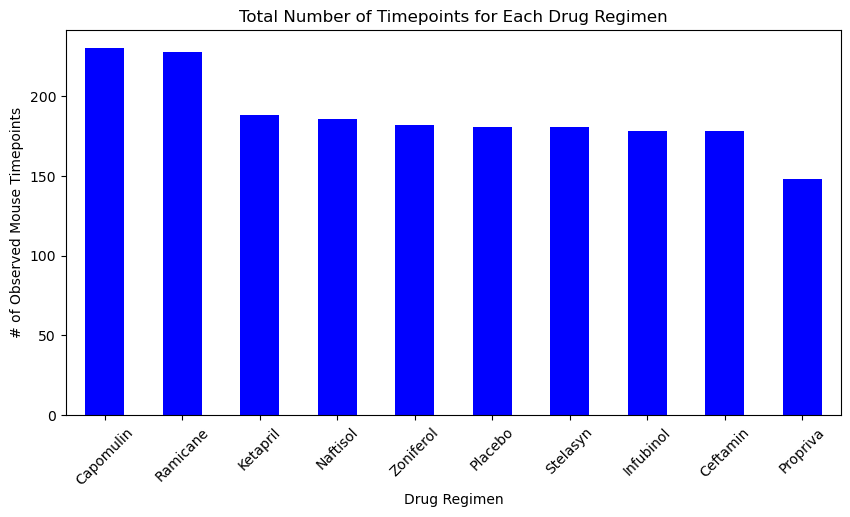

In [75]:
# Group by 'Drug Regimen' and count the number of rows
drug_regimen_counts = clean_data_df['Drug Regimen'].value_counts()

# Generate the bar plot
drug_regimen_counts.plot(kind='bar', figsize=(10, 5), color='b', title='Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

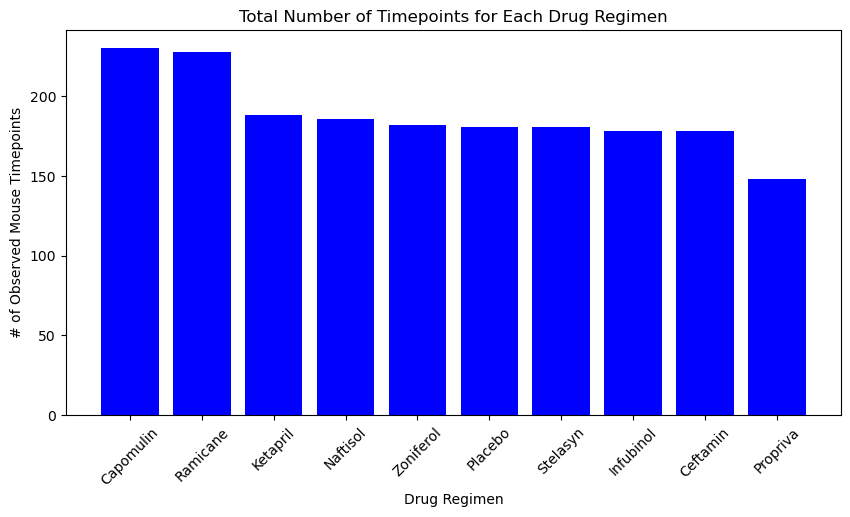

In [82]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group by 'Drug Regimen' and count the number of rows
drug_regimen_counts = clean_data_df['Drug Regimen'].value_counts()

# Generate the bar plot using pyplot
plt.figure(figsize=(10, 5))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='b')
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

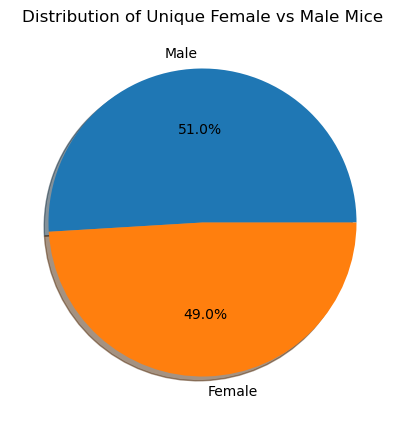

In [35]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_counts = clean_data_df['Sex'].value_counts()

# Generate the pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=360, figsize=(5, 5))
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('')  # Hide the y-label
plt.show()

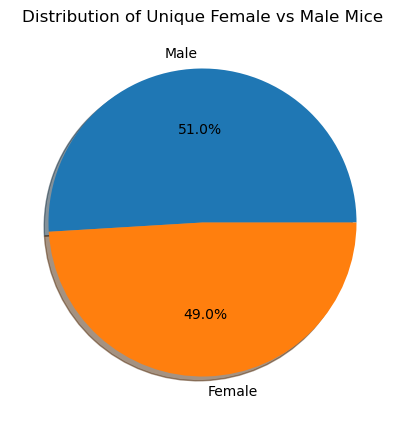

In [36]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_counts = clean_data_df['Sex'].value_counts()

# Generate the pie chart using pyplot
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', shadow=True, startangle=360)
plt.title('Distribution of Unique Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Step 1: Get the last (greatest) timepoint for each mouse
last_timepoint_df = clean_data_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 2: Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, clean_data_df, on=['Mouse ID', 'Timepoint'])

# Step 3: Filter the merged DataFrame to include only the desired treatment regimens
final_tumor_volume_df = merged_df[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Display the final DataFrame with the last tumor volume for each mouse
print(final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])


    Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0       a203    Infubinol         45           67.973419
1       a251    Infubinol         45           65.525743
3       a275     Ceftamin         45           62.999356
6       a411     Ramicane         45           38.407618
7       a444     Ramicane         45           43.047543
..       ...          ...        ...                 ...
238     y769     Ceftamin         45           68.594745
239     y793    Capomulin         45           31.896238
240     y865     Ceftamin         45           64.729837
244     z578     Ramicane         45           30.638696
245     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_df[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(treatment_data)
    # add subset
    Q1 = treatment_data.quantile(0.25)
    Q3 = treatment_data.quantile(0.75)
    IQR = Q3 - Q1
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


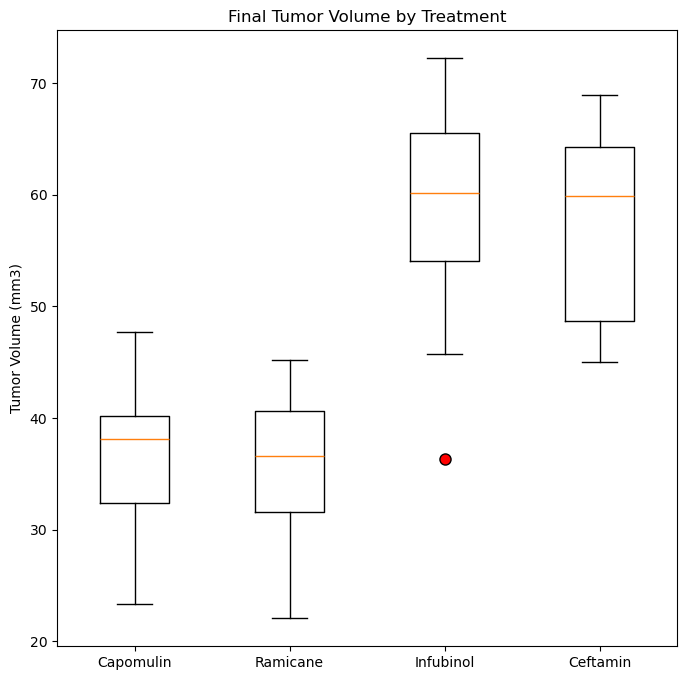

In [86]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 8))
plt.boxplot(tumor_volumes, labels=treatments, flierprops=dict(marker='o', color='red', markersize=8, markerfacecolor='red'))
plt.title('Final Tumor Volume by Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

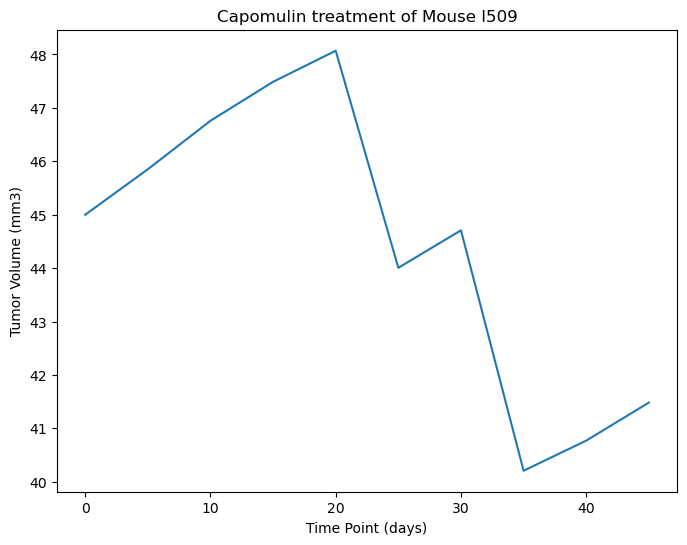

In [87]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the DataFrame for mouse ID 'l509'
mouse_data = clean_data_df[clean_data_df['Mouse ID'] == 'l509']

# Generate the line plot
plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of Mouse l509')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

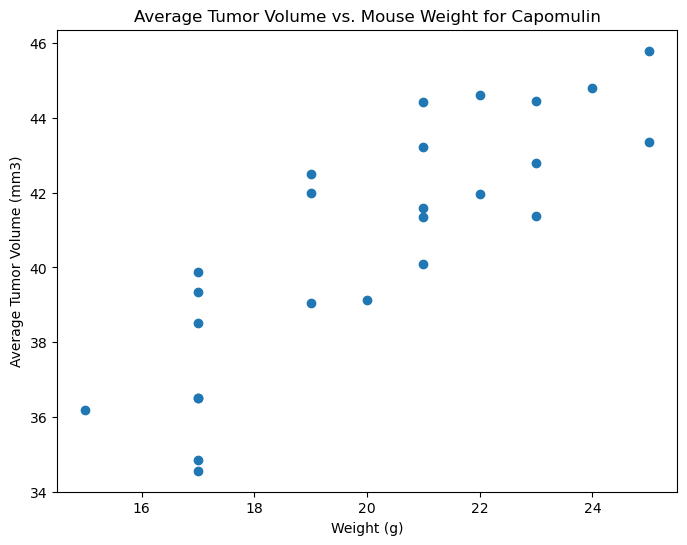

In [59]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate average tumor volume for each mouse in the Capomulin regimen
capomulin_data = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge with mouse weight data
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
scatter_data = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

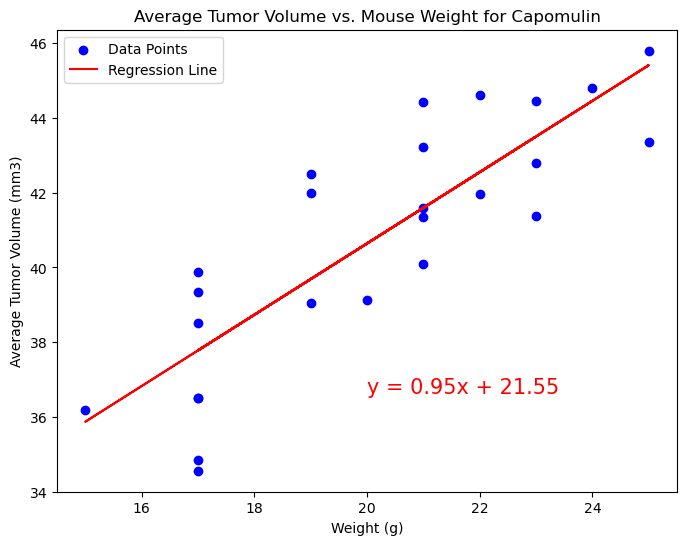

Correlation Coefficient: 0.8419363424694722
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723


In [79]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate average tumor volume for each mouse in the Capomulin regimen
capomulin_data = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge with mouse weight data
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
scatter_data = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])[0, 1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])

# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'], color='blue', label='Data Points')

# Create regression line
regression_line = slope * scatter_data['Weight (g)'] + intercept
plt.plot(scatter_data['Weight (g)'], regression_line, color='red', label='Regression Line')

# Add annotations
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.annotate(line_eq, (max(scatter_data['Weight (g)']) * 0.8, max(scatter_data['Tumor Volume (mm3)']) * 0.8), fontsize=15, color='red')

plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()

# Output the results
print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_value**2}')